In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
import numpy as np

random.seed(100)

In [2]:
### Data Preprocessing ###

dataset = pd.read_csv('/Users/swagataashwani/Desktop/MachineLearningTemplate/Eye_Surgery_Case_study/new_eye.csv')


In [3]:
dataset.head()
dataset.isna().any()
dataset['patient_sex'] = dataset['patient_sex'].astype(int)

In [5]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns

#---- how to encode surgeon_id -----????? 

#dataset = pd.get_dummies(dataset['surgeon_id'], sparse=True, drop_first=True)
# Removing extra columns
response = dataset["success"]
dataset = dataset.drop(columns = ["success","surgeon_id"])

In [6]:
dataset.head()

,patient_sex,treatment,initial_severity,age,patient_insurance_A,patient_insurance_B,patient_insurance_C,patient_insurance_D,patient_insurance_E,patient_insurance_F,patient_insurance_G,patient_insurance_H,patient_insurance_I,patient_insurance_J,over_under_correction_0,over_under_correction_OVER,over_under_correction_UNDER
0,1,1,1,50,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,1,21,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,1,45,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,1,37,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,49,0,1,0,0,0,0,0,0,0,0,1,0,0


In [7]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [9]:
X_test.head()

,patient_sex,treatment,initial_severity,age,patient_insurance_A,patient_insurance_B,patient_insurance_C,patient_insurance_D,patient_insurance_E,patient_insurance_F,patient_insurance_G,patient_insurance_H,patient_insurance_I,patient_insurance_J,over_under_correction_0,over_under_correction_OVER,over_under_correction_UNDER
436,0.819908,0.997143,0.985795,0.008449,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,-0.333598,-0.326938,2.873722,-0.330944,0.489807,-0.161416,-0.449515
951,0.819908,0.997143,-1.014410,0.611608,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,-0.333598,-0.326938,2.873722,-0.330944,0.489807,-0.161416,-0.449515
2288,0.819908,-1.002865,0.985795,0.410555,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,-0.328276,2.997618,-0.326938,-0.347981,-0.330944,-2.041619,-0.161416,2.224620
489,-1.219649,-1.002865,0.985795,0.008449,-0.329612,-0.330278,-0.342791,3.052432,-0.334921,-0.328276,-0.333598,-0.326938,-0.347981,-0.330944,0.489807,-0.161416,-0.449515
775,-1.219649,-1.002865,0.985795,0.310028,-0.329612,-0.330278,-0.342791,-0.327608,-0.334921,3.046213,-0.333598,-0.326938,-0.347981,-0.330944,0.489807,-0.161416,-0.449515


In [10]:
#### Model Building ####
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
### Comparing Models



Optimal number of features : 17


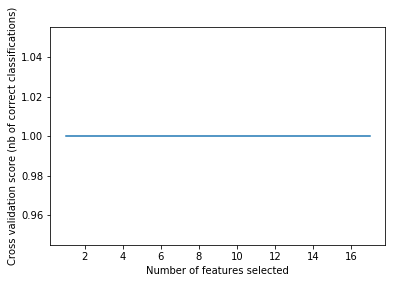

In [11]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty = 'l1')
classifier1.fit(X_train, y_train)

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier1, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
# Predicting Test Set
y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [13]:
print(results)

                       Model  Accuracy  Precision  Recall  F1 Score
0  Linear Regression (Lasso)       1.0        1.0     1.0       1.0


Optimal number of features : 17


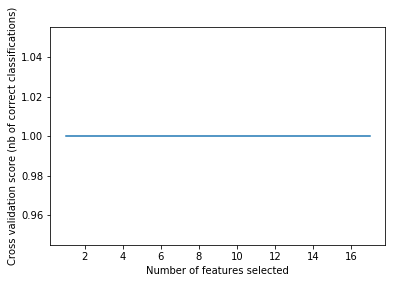

In [14]:
## SVM (Linear)
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
classifier2 = SVC(random_state = 0, kernel = 'linear')
classifier2.fit(X_train, y_train)
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier2, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
# Predicting Test Set
y_pred = classifier2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [16]:
print(results)

                       Model  Accuracy  Precision  Recall  F1 Score
0  Linear Regression (Lasso)       1.0        1.0     1.0       1.0
1               SVM (Linear)       1.0        1.0     1.0       1.0


In [17]:
## SVM (rbf)
from sklearn.svm import SVC
classifier3 = SVC(random_state = 0, kernel = 'rbf')
#classifier3.fit(X_train, y_train)
classifier3.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Predicting Test Set
y_pred = classifier3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [19]:
print(results)

                       Model  Accuracy  Precision  Recall  F1 Score
0  Linear Regression (Lasso)       1.0        1.0     1.0       1.0
1               SVM (Linear)       1.0        1.0     1.0       1.0
2                  SVM (RBF)       1.0        1.0     1.0       1.0


Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitt

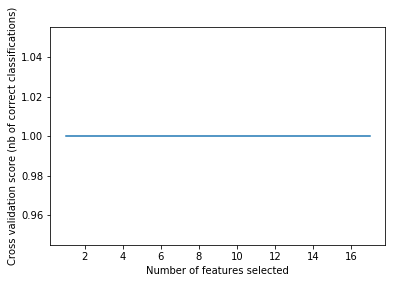

In [20]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier4.fit(X_train, y_train)
from pandas import Series

class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=500, min_samples_leaf=5, n_jobs=-1)
rfecv = RFECV(estimator=rf, step=1, cv=2, scoring='accuracy', verbose=2)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [21]:
# Predicting Test Set
y_pred = rfecv.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [22]:
print(results)

                       Model  Accuracy  Precision  Recall  F1 Score
0  Linear Regression (Lasso)       1.0        1.0     1.0       1.0
1               SVM (Linear)       1.0        1.0     1.0       1.0
2                  SVM (RBF)       1.0        1.0     1.0       1.0
3      Random Forest (n=100)       1.0        1.0     1.0       1.0


In [23]:
#Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
model = Sequential([
    Dense(units=16, input_dim = 17,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


## Training

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
2796/2796 [==============================] - 1s 238us/step - loss: 0.3848 - acc: 0.8319
Epoch 2/5
2796/2796 [==============================] - 0s 79us/step - loss: 0.0611 - acc: 0.9785
Epoch 3/5
2796/2796 [==============================] - 0s 81us/step - loss: 0.0143 - acc: 0.9979
Epoch 4/5
2796/2796 [==============================] - 0s 89us/step - loss: 0.0067 - acc: 0.9975
Epoch 5/5
2796/2796 [==============================] - 0s 127us/step - loss: 0.0049 - acc: 0.9993


In [27]:
score = model.evaluate(X_test, y_test)

700/700 [==============================] - 0s 133us/step


In [28]:
print(score)

[9.2755891741295e-06, 1.0]


In [29]:

## K-fold Cross Validation with best model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X= X_train, y = y_train,
                             cv = 10)
print("Best Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))



Best Classifier Accuracy: 1.00 (+/- 0.00)


Test Data Accuracy: 1.0000


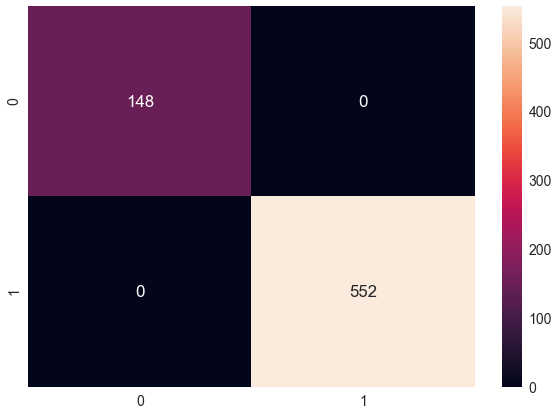

In [30]:
## Confusion Matrix with best model
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

